In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
ratings = pd.read_csv("Data/title_ratings_cleaned.gz", index_col = False, usecols = ["tconst", "averageRating"])
ratings = ratings.rename(columns={"averageRating" : "rating"})
genres = pd.read_csv("Data/title_basics_for_ratings_analysis.gz", index_col = False, usecols = ["tconst", "genres"])

In [3]:
merged = pd.merge(ratings, genres, on = "tconst")
merged = merged.dropna()
merged = merged.reset_index(drop=True)
merged

,tconst,rating,genres
0,tt0000009,5.9,Romance
1,tt0000147,5.2,"Documentary,News,Sport"
2,tt0000335,6.1,"Biography,Drama"
3,tt0000574,6.1,"Biography,Crime,Drama"
4,tt0000615,4.5,Drama
...,...,...,...
241251,tt9915790,7.3,Family
241252,tt9916132,3.6,"Biography,Documentary,History"
241253,tt9916160,6.6,Documentary
241254,tt9916428,4.1,"Adventure,History,War"


In [4]:
# split = pd.DataFrame(columns = ["genres"])
merged["genres"] = merged["genres"].str.split(",")
merged = merged.explode("genres")
arr = merged.genres.unique()
merged["genres"].value_counts()

Drama          111502
Comedy          63373
Documentary     35936
Romance         28454
Action          27314
Crime           21472
Thriller        20157
Horror          17436
Adventure       16914
Family           9631
Mystery          9229
Biography        7523
Fantasy          7322
History          6836
Music            6136
Sci-Fi           6012
Musical          5674
War              5542
Animation        4292
Western          3931
Adult            3839
Sport            2912
Film-Noir         788
News              678
Reality-TV         33
Talk-Show           4
Game-Show           1
Name: genres, dtype: int64

In [5]:
merged

,tconst,rating,genres
0,tt0000009,5.9,Romance
1,tt0000147,5.2,Documentary
1,tt0000147,5.2,News
1,tt0000147,5.2,Sport
2,tt0000335,6.1,Biography
...,...,...,...
241253,tt9916160,6.6,Documentary
241254,tt9916428,4.1,Adventure
241254,tt9916428,4.1,History
241254,tt9916428,4.1,War


In [6]:
drama = merged[merged["genres"] == "Drama"]
comedy = merged[merged["genres"] == "Comedy"]
documentary = merged[merged["genres"] == "Documentary"]
romance = merged[merged["genres"] == "Romance"]
action = merged[merged["genres"] == "Action"]
crime = merged[merged["genres"] == "Crime"]
thriller = merged[merged["genres"] == "Thriller"]

In [7]:
anova = stats.f_oneway(drama.rating, comedy.rating, documentary.rating, romance.rating, action.rating, crime.rating, thriller.rating)
print(anova)

F_onewayResult(statistic=6911.846926975639, pvalue=0.0)


In [8]:
df = pd.DataFrame(columns = ["drama", "comedy", "documentary", "romance" , "action" , "crime" , "thriller"])
df.drama = drama.rating
df.comedy = comedy.rating
df.documentary = documentary.rating
df.romance = romance.rating
df.action = action.rating
df.crime = crime.rating
df.thriller = thriller.rating

df_melt = pd.melt(df)
df_melt = df_melt.dropna()

df_melt

,variable,value
0,drama,6.1
1,drama,6.1
2,drama,4.5
3,drama,3.2
4,drama,4.8
...,...,...
780344,thriller,7.8
780357,thriller,6.2
780376,thriller,6.1
780456,thriller,4.5


In [9]:
posthoc = pairwise_tukeyhsd(
  df_melt['value'], df_melt['variable'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     action      comedy   0.3852  0.001  0.3429  0.4276   True
     action       crime   0.2366  0.001  0.1909  0.2823   True
     action documentary   1.3845  0.001  1.3084  1.4606   True
     action       drama   0.3824  0.001  0.3471  0.4176   True
     action     romance   0.3558  0.001   0.313  0.3985   True
     action    thriller   0.0242 0.7902 -0.0276  0.0761  False
     comedy       crime  -0.1486  0.001 -0.1886 -0.1086   True
     comedy documentary   0.9993  0.001  0.9265  1.0721   True
     comedy       drama  -0.0029    0.9 -0.0303  0.0245  False
     comedy     romance  -0.0295 0.2097 -0.0661  0.0071  False
     comedy    thriller   -0.361  0.001 -0.4079 -0.3141   True
      crime documentary   1.1479  0.001  1.0731  1.2228   True
      crime       drama   0.1457  0.001  0.1133  0.1782

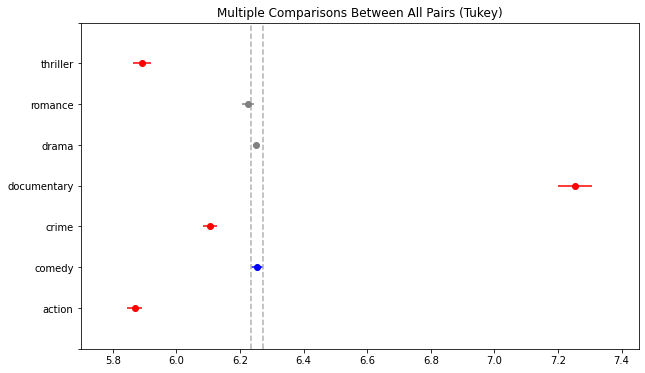

In [10]:
fig = posthoc.plot_simultaneous("comedy")
plt.show()

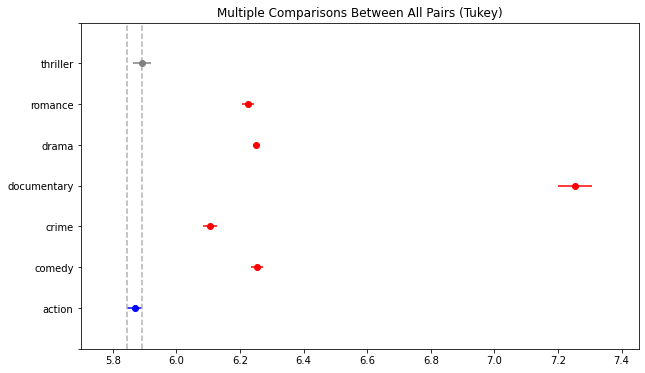

In [11]:
fig = posthoc.plot_simultaneous("action")
plt.show()

In [12]:
df_genre_merge = pd.merge(drama, romance, on = "tconst")
df_genre_merge = pd.merge(df_genre_merge, comedy, on = "tconst")
df_genre_merge = df_genre_merge.rename(columns={"rating" : "rating_z", "genres": "genres_z"})
df_genre_merge

,tconst,rating_x,genres_x,rating_y,genres_y,rating_z,genres_z
0,tt0005179,5.8,Drama,5.8,Romance,5.8,Comedy
1,tt0006826,5.6,Drama,5.6,Romance,5.6,Comedy
2,tt0008845,5.7,Drama,5.7,Romance,5.7,Comedy
3,tt0010806,7.0,Drama,7.0,Romance,7.0,Comedy
4,tt0011575,5.9,Drama,5.9,Romance,5.9,Comedy
...,...,...,...,...,...,...,...
3667,tt9848968,7.5,Drama,7.5,Romance,7.5,Comedy
3668,tt9849230,5.3,Drama,5.3,Romance,5.3,Comedy
3669,tt9857480,8.1,Drama,8.1,Romance,8.1,Comedy
3670,tt9889926,5.8,Drama,5.8,Romance,5.8,Comedy


In [13]:
df_genre_merge2 = pd.merge(thriller, action, on = "tconst")
df_genre_merge2

,tconst,rating_x,genres_x,rating_y,genres_y
0,tt0010614,7.6,Thriller,7.6,Action
1,tt0010795,6.9,Thriller,6.9,Action
2,tt0012164,7.8,Thriller,7.8,Action
3,tt0012877,4.5,Thriller,4.5,Action
4,tt0014429,8.1,Thriller,8.1,Action
...,...,...,...,...,...
3309,tt9742422,5.8,Thriller,5.8,Action
3310,tt9786512,6.2,Thriller,6.2,Action
3311,tt9794630,6.8,Thriller,6.8,Action
3312,tt9799984,6.3,Thriller,6.3,Action
